 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

https://onlinecourses.science.psu.edu/stat100/node/58

https://en.wikipedia.org/wiki/Standard_error

http://www.stat.wmich.edu/s216/book/node79.html


In [1]:
?rnorm

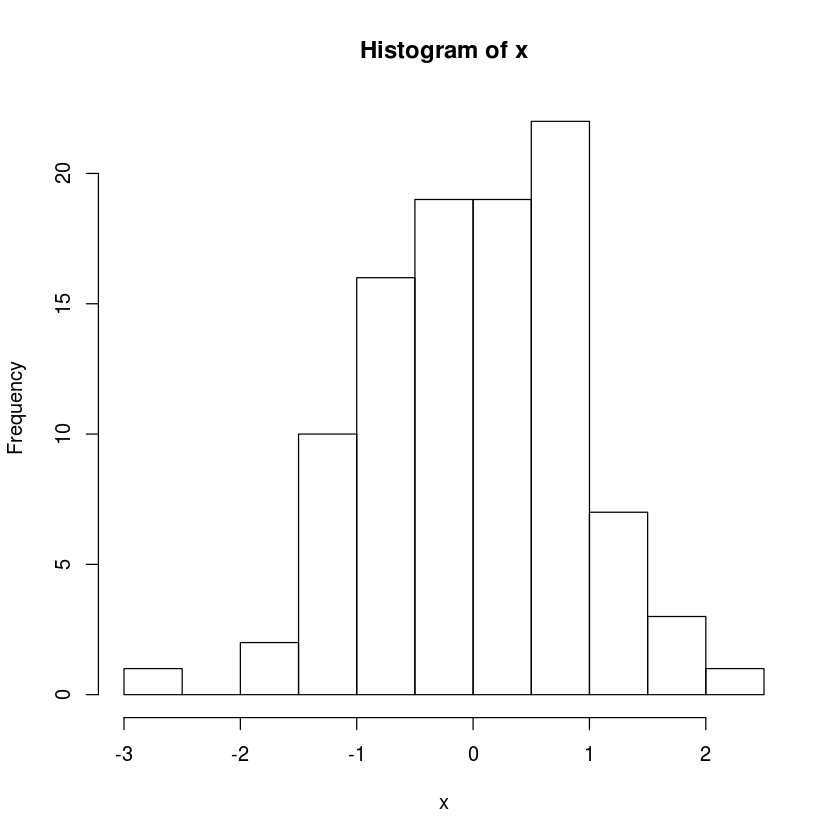

In [2]:
x <- rnorm(100)
hist(x, breaks = 15)

In [3]:
mean(x)
sd(x)

[1] 0.02551064

[1] 0.9035626

[1] -0.005406745

[1] 1.000098

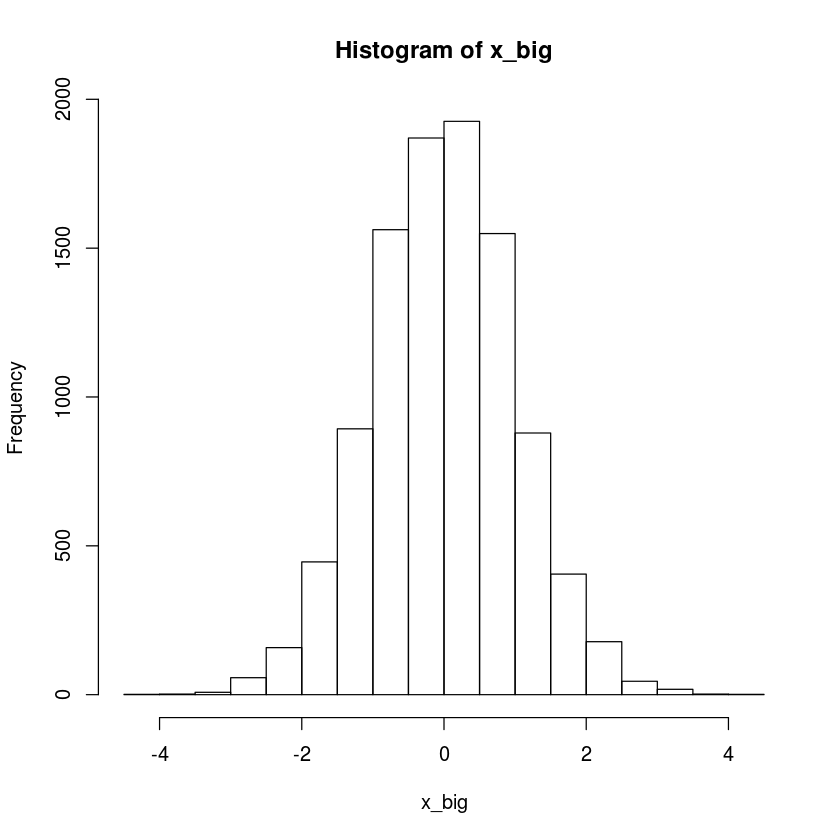

In [4]:
x_big <- rnorm(10000)
mean(x_big)
sd(x_big)
hist(x_big, breaks = 15)

${\displaystyle {\text{SE}}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}}$

In [5]:
# normal approximation -> error of the mean reflects the error in estimating the mean and is normally distributed
sd(x) / sqrt(length(x))
sd(x_big) / sqrt(length(x_big))

[1] 0.09035626

[1] 0.01000098

$\Pr[a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx.$

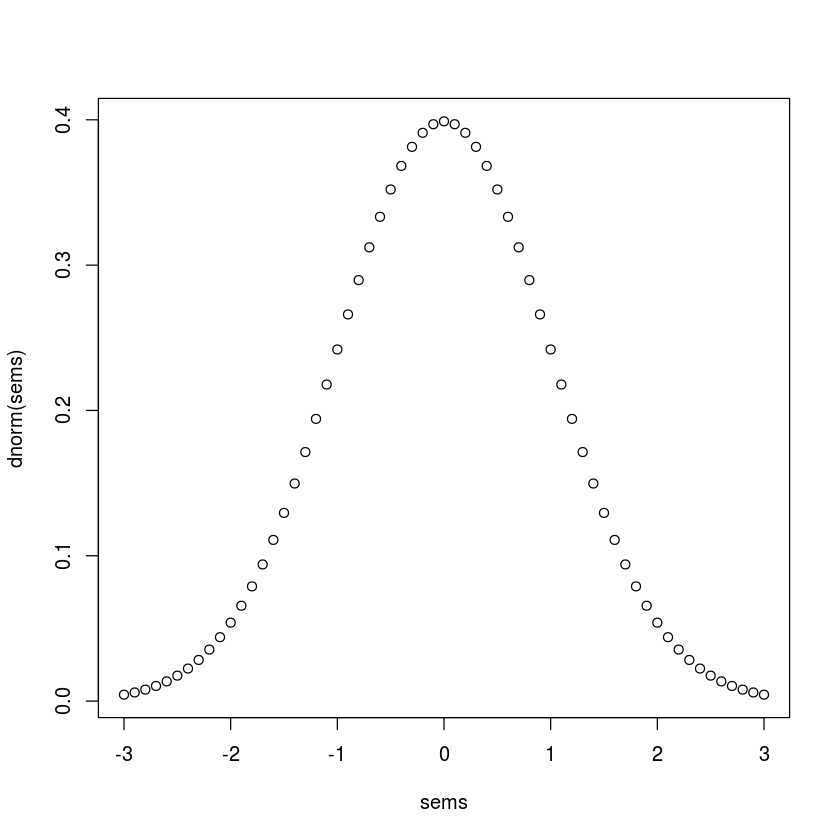

In [6]:
sems <- seq(-3, 3, 0.1)
plot(sems, dnorm(sems))

${\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{k=1}^{N}{\frac {f(x_{k-1})+f(x_{k})}{2}}\Delta x_{k}}$

Pokud platí:

${\displaystyle \Delta x_{k}=\Delta x={\frac {b-a}{N}}}$

lze převést na:

${\displaystyle \int _{a}^{b}f(x)\,dx\approx {\frac {\Delta x}{2}}\sum _{k=1}^{N}\left(f(x_{k-1})+f(x_{k})\right)}$

${\displaystyle {}={\frac {\Delta x}{2}}(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+\dotsb +2f(x_{N-1})+f(x_{N}))}$

In [7]:
integrate <- function(a, b, steps, func, ...) {
    # integrace funkce jedné proměnné v intervalu od "a" do "b"
    # lichoběžníkovou metodou s krokem "step"
    
    if (a > b) stop("a > b") 
    
    dx <- (b - a) / steps
    y <- func(seq(a, b, dx), ...)
    
    0.5 * dx * (
        y[1] 
        + sum(2*y[c(-1, -length(y))]) 
        + y[length(y)]
    )
}

In [8]:
integrate(-1, 1, 100, dnorm) * 100
integrate(-1.96, 1.96, 100, dnorm) * 100
integrate(-3.0, 3.0, 100, dnorm) * 100

[1] 68.26734

[1] 94.99749

[1] 99.72922

$F_{X}(x)=\int _{-\infty }^{x}f_{X}(t)\,dt.$

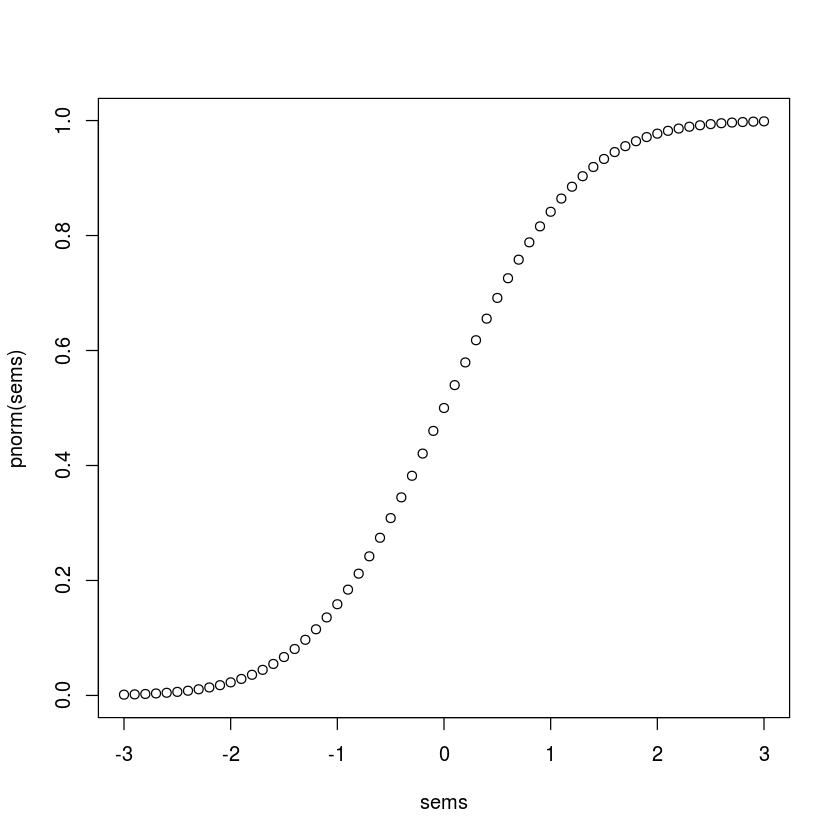

In [9]:
plot(sems, pnorm(sems))

In [10]:
pnorm(-1)

[1] 0.1586553

In [11]:
integrate(-10, -1, 100, dnorm)

[1] 0.1588186

In [12]:
pnorm(-1)
qnorm(pnorm(-1))

[1] 0.1586553

[1] -1

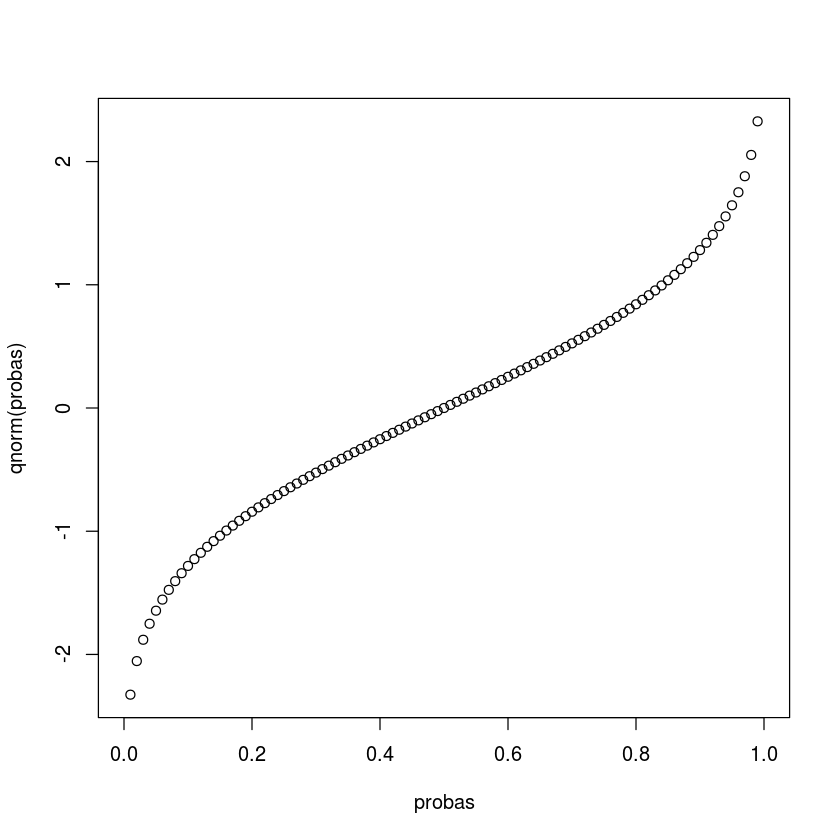

In [13]:
probas <- seq(0, 1, 0.01)
plot(probas, qnorm(probas))

In [14]:
integrate(-5, -1.96, 100, dnorm)
integrate(1.96, 5, 100, dnorm)

[1] 0.02500643

[1] 0.02500643

In [15]:
qnorm(0.975)

[1] 1.959964

http://www.cyclismo.org/tutorial/R/pValues.html#t-test